# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_wheader.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_wheader.csv"
paths.gen_1_path <- "../data/results/gen_prof_1000.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,X1772072276_E05,X914mat_H11,X1772071068_B07,GHA501A161,X1772072285_A02,X1772067078_D01,X1772071037_A07,P1.4.C12,X915mat_A11,X1772067095_E06,⋯,X1772067090_F12,X1772071032_B07,X915mat_F2,P1.5.D10,X819b_A11,X1772071034_E01,X1772067095_C06,AG2pos_70,P1.3.H10,X1772067056_F11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,2.185867,0.000000,6.244983,0.000000,0.000000,0.000000,5.312883,0.000000,0,⋯,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,4.8968410,0.000000,0.000000
Cd47,0.000000,2.201634,2.211667,9.395482,3.794915,0.000000,2.703221,4.848498,3.033863,0,⋯,0.000000,0.000000,0.5058909,5.773733,3.657640,3.906619,3.543340,5.7978315,3.742006,0.000000
Elmo2,0.000000,6.457463,0.000000,1.563180,0.000000,0.000000,0.000000,4.789208,0.000000,0,⋯,0.000000,0.000000,5.3136087,5.969703,5.882399,0.000000,0.000000,0.0000000,4.473787,0.000000
Crip2,5.603894,5.970854,0.000000,0.000000,5.656519,6.397983,7.220371,4.238787,8.365010,0,⋯,7.001264,6.507275,6.4974527,2.140779,8.622308,6.761019,6.112525,5.6597434,5.048759,6.928016
Pprc1,0.000000,6.683135,0.000000,1.976308,0.000000,0.000000,0.000000,5.522935,4.855990,0,⋯,0.000000,0.000000,4.6229304,4.878235,5.195348,0.000000,0.000000,0.0000000,4.032101,0.000000
Ccdc174,5.192658,2.035624,0.000000,2.441693,0.000000,0.000000,3.153980,2.963474,0.000000,0,⋯,0.000000,0.000000,1.2326608,3.927896,5.461070,0.000000,0.000000,0.3565304,1.432959,0.000000


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,X1772067078_F01,X1772072256_A04,X915mat_D7,X1772071061_C06,X1772067071_E12,X1772072275_C04,X1772071025_G10,GHA501A99,P1.4.B4,X1772071026_A07,⋯,GHA501A70,P2.1.E11,P1.6.G9,X1772071066_C01,X1772067071_C11,P1.4.D3,X1772067085_C01,X1772067084_E05,X1772067086_A07,X1772071066_E04
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.3412742,3.184861,0.000000,0.000000,0,3.921598,0.000000,0.000000,⋯,1.7801001,2.733354,0.000000,0,0.000000,5.057450,0.000000,0.00000,0.000000,0
Cd47,0.000000,4.431887,0.0000000,1.863625,3.542647,0.000000,0,8.581246,5.945093,3.837048,⋯,9.2950091,6.300673,4.323370,0,0.000000,5.549361,3.452111,0.00000,2.307694,0
Elmo2,0.000000,0.000000,0.9259994,0.000000,0.000000,0.000000,0,6.343773,0.000000,3.481645,⋯,0.5416181,5.930737,5.809157,0,3.165435,4.999549,1.537250,0.00000,0.000000,0
Crip2,5.867711,4.772839,7.9027972,6.168253,0.000000,5.438343,0,0.000000,9.175450,6.687053,⋯,0.0000000,3.646163,4.496335,0,6.339514,3.097611,6.441090,6.66738,6.842295,0
Pprc1,0.000000,0.000000,2.6735564,0.000000,0.000000,0.000000,0,2.725903,0.000000,0.000000,⋯,0.2765536,3.224966,4.494416,0,0.000000,3.739848,0.000000,0.00000,0.000000,0
Ccdc174,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0,1.939234,0.000000,4.325534,⋯,5.3613503,3.181103,1.594549,0,0.000000,3.925999,0.000000,0.00000,0.000000,0


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

min(genprof_1_raw, na.rm=TRUE)
max(genprof_1_raw, na.rm=TRUE)

,gencell_ep1000_0,gencell_ep1000_1,gencell_ep1000_2,gencell_ep1000_3,gencell_ep1000_4,gencell_ep1000_5,gencell_ep1000_6,gencell_ep1000_7,gencell_ep1000_8,gencell_ep1000_9,⋯,gencell_ep1000_490,gencell_ep1000_491,gencell_ep1000_492,gencell_ep1000_493,gencell_ep1000_494,gencell_ep1000_495,gencell_ep1000_496,gencell_ep1000_497,gencell_ep1000_498,gencell_ep1000_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.4392271,0.3326504,0.3058048,0.2541018,0.3262897,0.3323163,0.3216004,0.2867440,0.3848887,0.4574358,⋯,0.3308622,0.3298639,0.3311391,0.3304740,0.3119676,0.3832809,0.3314908,0.2796792,0.2578916,0.3317571
Cd47,0.1725787,0.7451388,0.5016999,0.2615007,0.7366000,0.7366319,0.7215813,0.4751328,0.1279358,0.1944241,⋯,0.7521750,0.7408829,0.7490292,0.7429697,0.7028561,0.1358370,0.7485303,0.1092687,0.1535478,0.7377740
Elmo2,0.3451100,0.3155045,1.1143200,1.2176026,0.3517104,0.3378470,0.5680315,1.1179210,0.5727860,0.2548243,⋯,0.2806612,0.3340132,0.3235389,0.2926681,0.6060219,0.5751444,0.2694032,1.1074850,1.1219351,0.3028758
Crip2,0.7682357,2.8842190,1.3833327,1.3063817,2.8132715,2.8570492,2.4901261,1.3149165,0.9140060,0.7020804,⋯,2.9341688,2.8594146,2.8457181,2.9065576,2.4262414,0.9369196,2.9513410,1.2521492,1.2905321,2.8935838
Pprc1,0.4546865,0.2945432,0.7909873,0.8423825,0.3228486,0.3159623,0.4439927,0.7986488,0.5356126,0.3889329,⋯,0.2739835,0.3038159,0.3165539,0.2832897,0.4566311,0.5348775,0.2689798,0.8109978,0.8110813,0.2940432
Ccdc174,0.7929347,0.2102916,0.5001881,0.5927278,0.2194565,0.2156549,0.2909437,0.4963502,0.7698001,0.8236774,⋯,0.2006848,0.2107387,0.2205271,0.2040328,0.2844303,0.7529211,0.1981005,0.6340007,0.6282159,0.2076901


[1] -1.422588

[1] 5.030357

Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 4 features requested have zero variance (running reduction without them): Dcdc2c, Smco1, Clca1, Shisa2”
PC_ 1 
Positive:  Rplp1, Dmkn, Sbsn, Perp, Rps29, Rps3a1, Klf4, Krtdap, Anxa8, Krt10 
	   B2m, Fam25c, Actb, Calm4, Hspb1, Lgals7, Dsg1a, Ly6g6c, Sdc4, Krt15 
	   Ly6d, Spink5, Pof1b, Fos, Cst6, Dapl1, Rpl4, Sfn, Gas6, Tacstd2 
Negative:  Zfp488, Eno1, Tonsl, Rab7, Fn1, Ruvbl2, Pfas, Rbm15, Pxdn, Dvl3 
	   Lamb1, Hnrnpa1, Galk1, Krit1, Spc24, Fads1, Fstl1, Cbx1, Fscn1, Tubb6 
	   Dcakd, Scd2, Pdlim7, Zbtb38, Kansl2, Nme4, Mtap, Glipr1, Dynlt1b, Pdpn 
PC_ 2 
Positive:  Nupr1, Klk8, Acer1, Crabp2, Dhrs7, Ptgs1, Ybey, Rbm48, Ly6a, 2200002D01Rik 
	   Pgm2, Ptges, Cyp2j6, Acsbg1, Ptgr1, Orm1, Slc9a3r1, Car13, Polr2l, Gjb5 
	   Bnip3, Clu, Chmp5, Fosl1, Hbegf, Dynlt1a, Higd1a, Metrnl, Agpat4, Cyp51 
Negative:  Raly, Atp6v0c, Dtnb, Ptch1, Dennd1a, Bnc2, Usp50, Itgb4, Gli2, Gtf2ird1 
	   Mob1a,

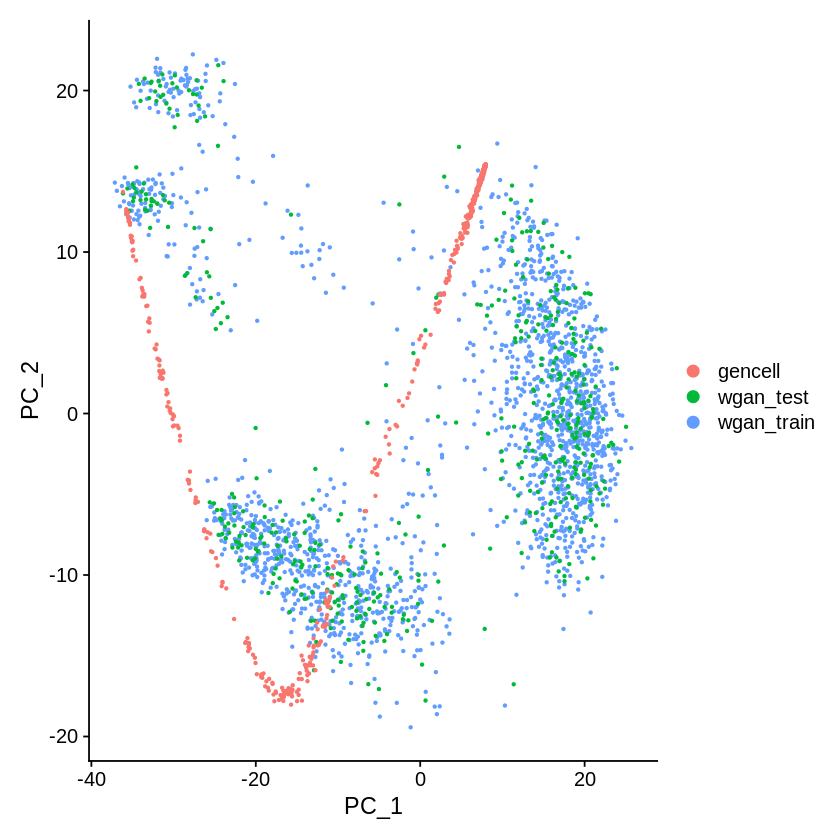

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

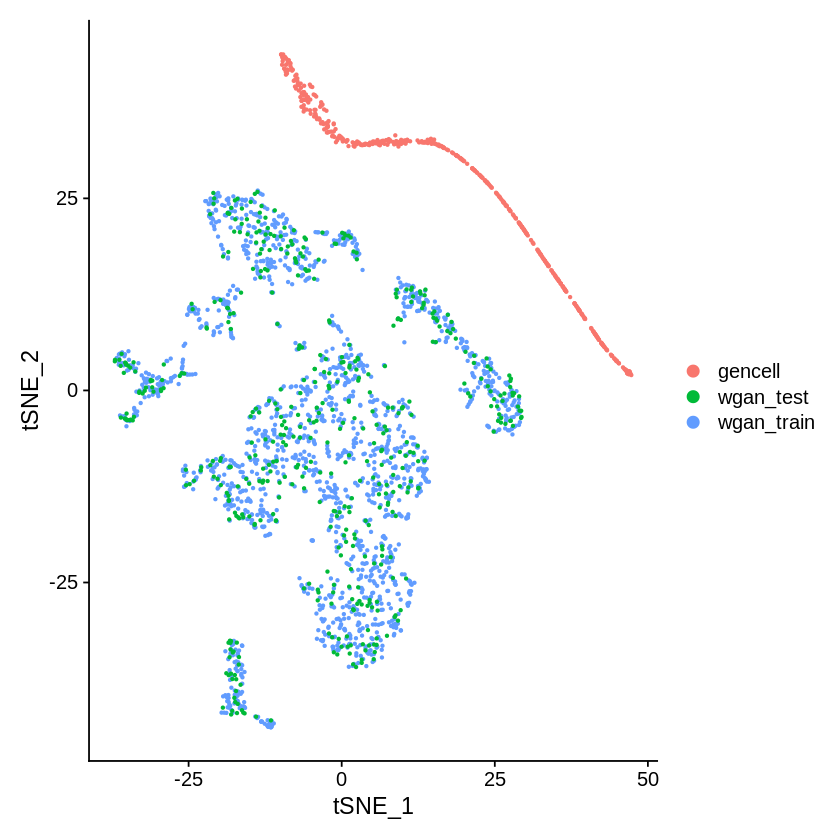

In [19]:
DimPlot(data_combined, reduction = "tsne")